In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline  
df = pd.read_csv(r"C:\Users\etsus\Desktop\IRONHACK\lab work\lab-eda-univariate\amz_uk_price_prediction_dataset.csv")


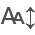

In [2]:
#pip install itables
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

In [3]:
#1.1 Create a crosstab between the product category and the isBestSeller status.
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result


isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]

In [17]:
sum_rows = crosstab_result.sum(axis=1)
sum_rows.sort_values(ascending=False)
#Are there categories where being a best-seller is more prevalent? Yes Sport n Outdors,Beauty

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Plugs                                        107
Alexa Built-In Devices                       107
Smart Home Security & Lighting               104
Smart Speakers                                54
Length: 296, dtype: int64

In [18]:
#Statistical Tests:
#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

from scipy.stats import chi2_contingency
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)
chi2_statistic, chi2_p_value
# A 0 means the two variables are completely independent.

(36540.20270061387, 0.0)

In [19]:
# Compute Cram√©r's V to understand the strength of association between best-seller status and category.
from scipy.stats.contingency import association
association(crosstab_result, method="cramer")
#Moderate,but not very strong in practical terms.

0.1222829439760564

In [20]:
frequency_table = df['isBestSeller'].value_counts().head(5)
proportion_table = df['isBestSeller'].value_counts(normalize=True).head(5)
display(frequency_table, proportion_table*100)

isBestSeller
False    2435671
True        7980
Name: count, dtype: int64

isBestSeller
False    99.673439
True      0.326561
Name: proportion, dtype: float64

<Axes: xlabel='category'>

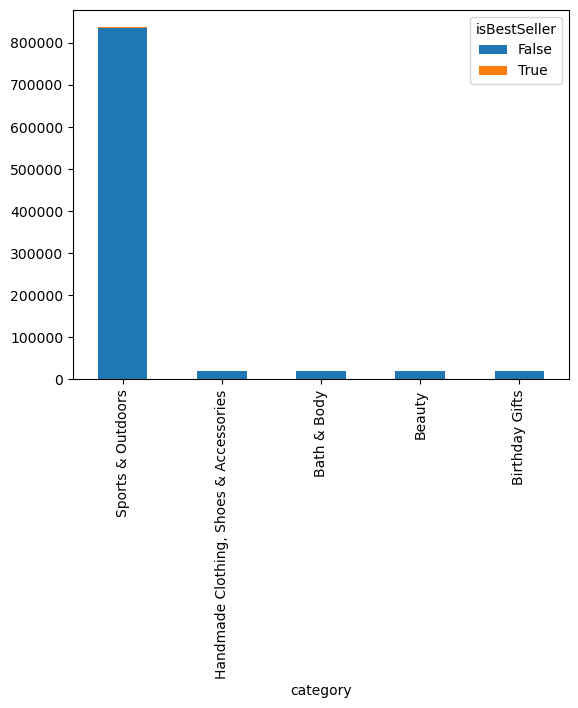

In [21]:
crosstab_result.sort_values(by=crosstab_result.columns.tolist(), ascending=False).head(5).plot(kind="bar", stacked=True)

In [32]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [41]:
#Preliminary Step: Remove outliers in product prices.

data_series = df['price']
outliers = tukeys_test_outliers(data_series)
print(outliers)
outliers.reset_index(drop=True, inplace=True)
df = df.iloc[~outliers.index,:]

2443619    166.99
2443614    119.95
2443613    169.99
2443581    158.49
2443577    166.99
            ...  
73         145.00
69         230.95
37         368.99
36         169.00
31         199.99
Name: price, Length: 42848, dtype: float64


<Axes: xlabel='price', ylabel='category'>

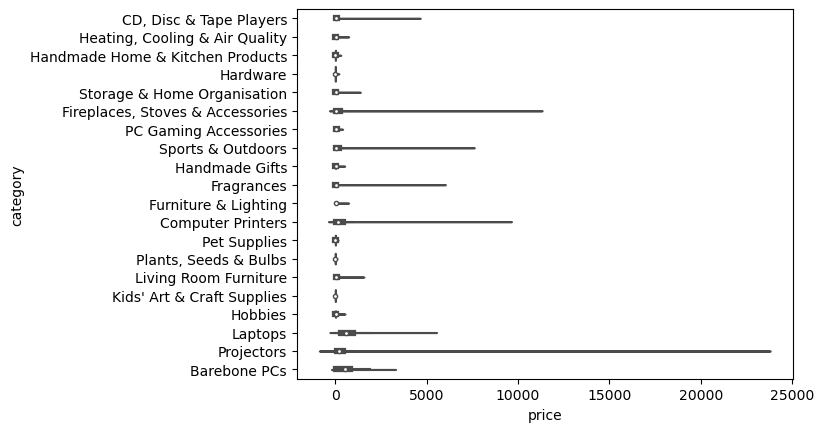

In [42]:
top_categories = df['category'].value_counts().nlargest(20).index
df_top_categories = df[df['category'].isin(top_categories)]
sns.violinplot(data=df_top_categories, y='category', x='price', palette="coolwarm")

In [83]:
print(df.groupby("category")['price'].agg(['median']).sort_values("median", ascending=False).index[0])

Laptops


<Axes: xlabel='category'>

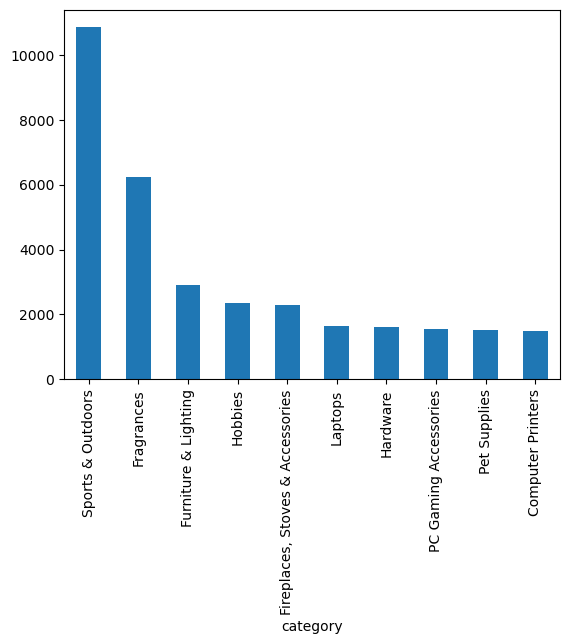

In [101]:
top_categories = df['category'].value_counts().head(10)
top_categories.plot(kind="bar", stacked=True)



In [102]:
print(df.groupby("category")['price'].agg(['mean']).sort_values("mean", ascending=False).index[0])

Lab & Scientific Products


<Axes: xlabel='stars', ylabel='category'>

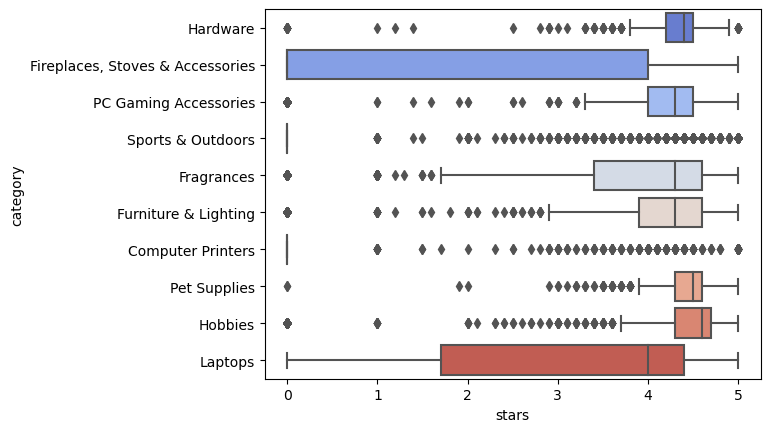

In [106]:
top_categories10 = df['category'].value_counts().nlargest(10).index
df_top_categories10 = df[df['category'].isin(top_categories10)]
sns.boxplot(data=df_top_categories10, x='stars', y='category', palette="coolwarm")

In [107]:
print(df.groupby("category")['stars'].agg(['median']).sort_values("median", ascending=False).index[0])

Computer Memory


In [108]:
correlation = df['price'].corr(df['stars'])
correlation

#No there is no correlatins between price and its rating.

-0.1853461556454893

<Axes: xlabel='price', ylabel='stars'>

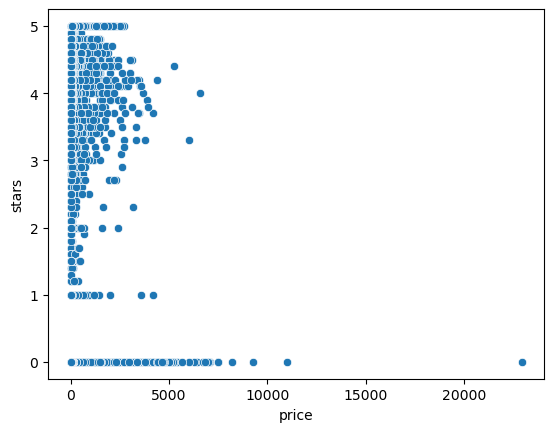

In [109]:
sns.scatterplot(data=df, x='price', y='stars')
# i observe no relationship or known patern to add anything.

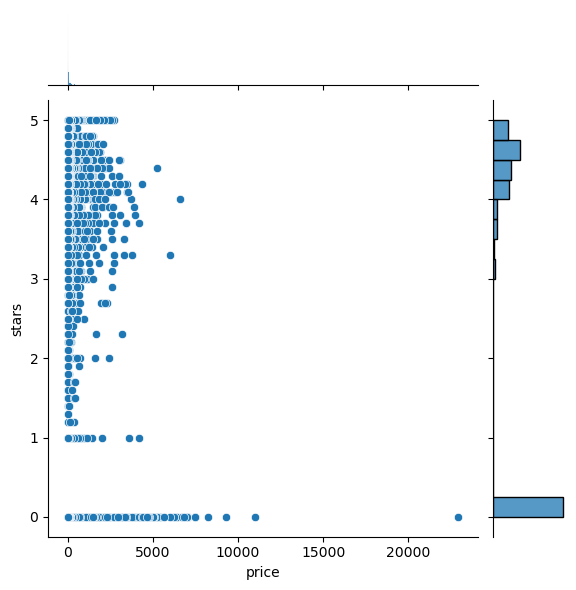

In [111]:
sns.jointplot(y=df['stars'], x=df['price'])  

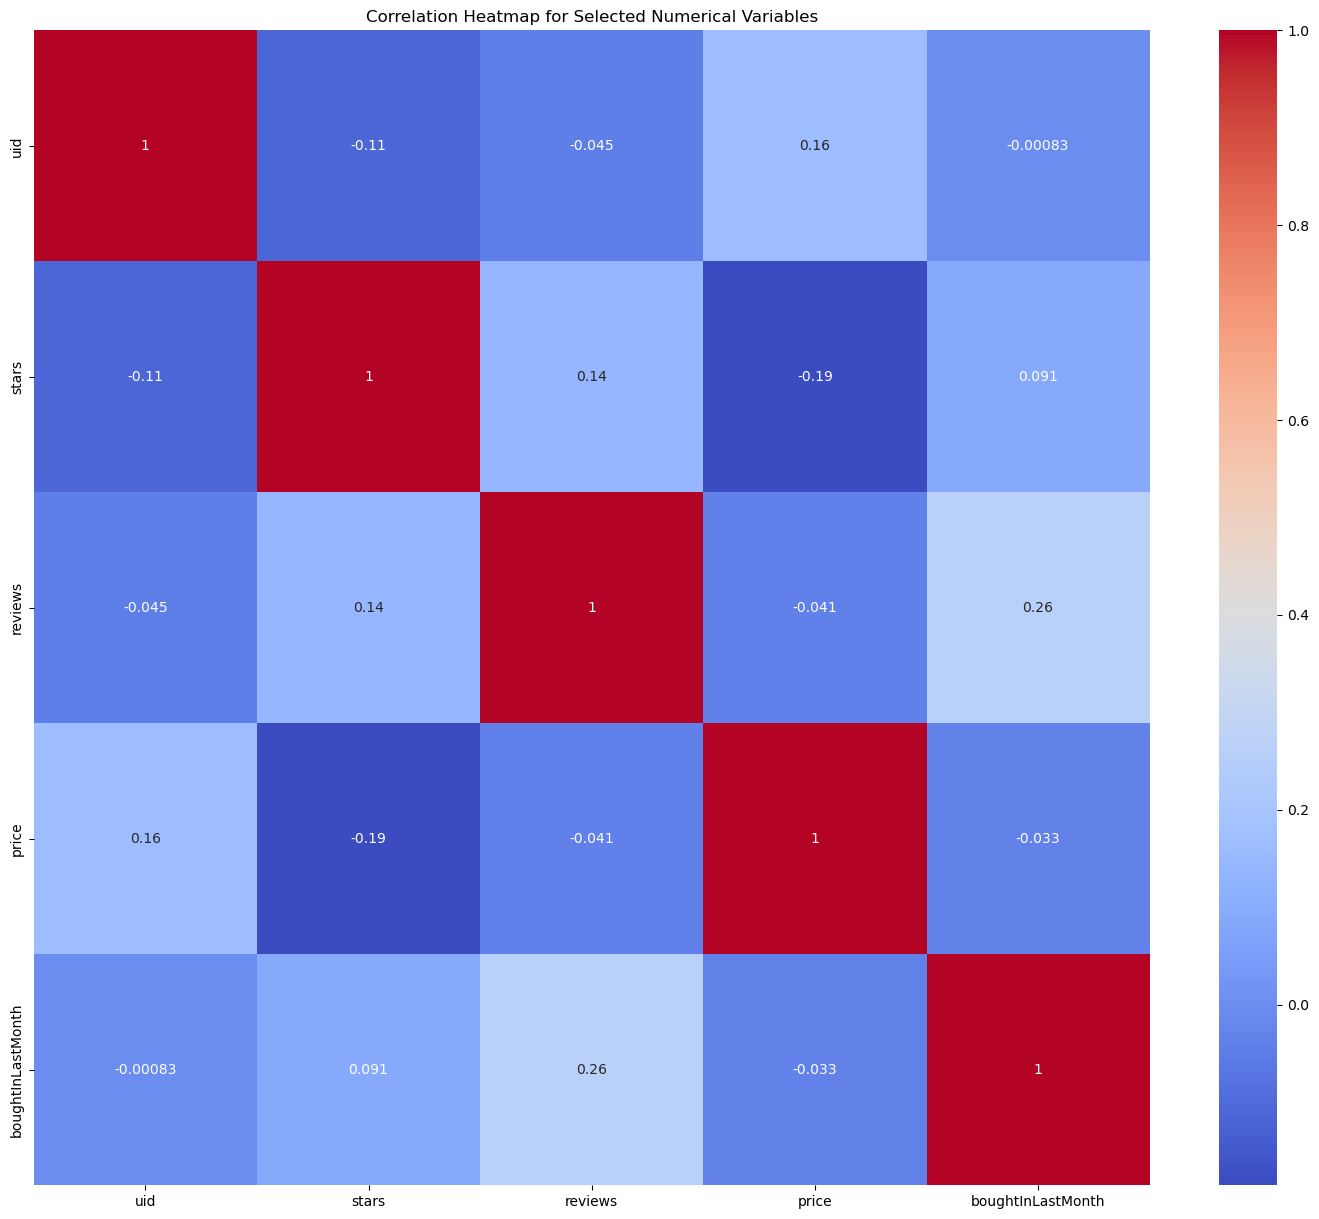

In [116]:
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

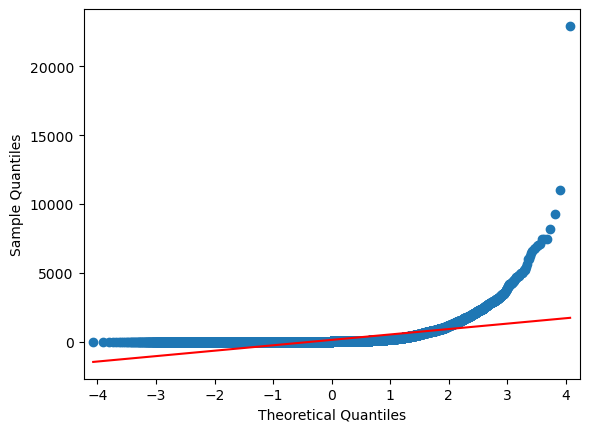

In [117]:
import statsmodels.api as sm
sm.qqplot(df['price'], line='s');